In [ ]:
# Imports
library(Seurat)
library(ggplot2)
library(decoupleR)
library(stringr) 
library(gridExtra)
library(dplyr)
library(dplyr)
library(tibble)
library(tidyr)
library(patchwork)
library(ggplot2)
library(pheatmap)
library(clusterProfiler)
library(org.Mm.eg.db)
library(fgsea)
library(msigdbr)
library(homologene)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=18, repr.plot.height=18)

# Read macrophage data humans
macrophages <- readRDS("../../../data/R Objects/Macrophage R Objects/all_humans_macrophage_data_annotatedv2.rds")

In [20]:
macrophages <- SetIdent(macrophages, value = "seurat_clusters")
macrophages <- RenameIdents(macrophages,
                                   '0' = 'Inflammatory Macrophages',
                                   '1' = 'Resident-like Macrophages',
                                   '2' = 'Inflammatory Macrophages', # Do FindMarkers first before comitting on this one
                                   '3' = 'Inflammatory Macrophages',
                                   '4' = 'Resident-like Macrophages',
                                   '5' = 'LAM',
                                   '6' = 'iLAM', #TREM1 Foamy (possible)
                                   '7' = 'Inflammatory Macrophages',
                                   '8' = 'LAM',
                                   '9' = 'Resident-like Macrophages',
                                   '10' = 'LAM',
                                   '11' = 'Inflammatory Macrophages', # Do FindMarkers first before comitting on this on | Inflammatory Macrophages (?)
                                   '12' = 'IFNIC Macrophages')

In [ ]:
# Define custom colors
colors = c("#80CED7", "#55D6BE", "#006494", "#8E6C88", "#1B98E0", "#B91372")

In [21]:
# We have to rename the macrophage subtypes
# Assign new labels
macrophages <- SetIdent(macrophages, value = "seurat_clusters")
macrophages <- RenameIdents(macrophages,
                                   '0' = 'Inflammatory Macrophages',  # was Inflammatory Resident-like
                                   '1' = 'Inflammatory Macrophages',
                                   '2' = 'Inflammatory Macrophages', 
                                   '3' = 'Resident-like Macrophages', #3
                                   '4' = 'Resident-like Macrophages',
                                   '5' = 'iLAM',
                                   '6' = 'iLAM',
                                   '7' = 'LAM',
                                   '8' = 'Inflammatory Macrophages', # was Inflammatory Resident-like
                                   '9' = 'IFNIC Macrophages',
                                   '10' = 'LAM',
                                   '11' = 'LAM',
                                   '12' = 'iLAM',
                                   '13' = 'Proliferating Macrophages')

In [3]:
# Transcription factor analysis
collectri_dataset <- decoupleR::get_collectri(organism = 'mouse', 
                                split_complexes = FALSE)

# Extract the normalized log-transformed counts
data_matrix <- as.matrix(macrophages@assays$RNA["data"])

# Run ulm
acts <- decoupleR::run_ulm(mat = data_matrix, 
                           net = collectri_dataset, 
                           .source = 'source', 
                           .target = 'target',
                           .mor='mor', 
                           minsize = 5)

acts

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 6.0 GiB"


statistic source condition               score      p_value     
1     ulm       Hnf4a  AAACCCAAGGCACCAA-1_3_4   2.0090608 0.04453608  
2     ulm       Hnf4a  AAACCCAAGTGGACTG-1_9_4   0.4201928 0.67434645  
3     ulm       Hnf4a  AAACCCACAAGCGAGT-1_7_4  -0.2855623 0.77521456  
4     ulm       Hnf4a  AAACCCACAGTTAGAA-1_9_4  -0.2489571 0.80339499  
5     ulm       Hnf4a  AAACCCAGTTTAAGGA-1_2_4  -0.3076524 0.75834810  
6     ulm       Hnf4a  AAACCCATCGTGCACG-1_3_4   1.3063460 0.19144097  
7     ulm       Hnf4a  AAACCTGAGAGACTTA-P6_5   -0.2867069 0.77433796  
8     ulm       Hnf4a  AAACCTGCACCAGCAC-1_8_2  -0.3377149 0.73557945  
9     ulm       Hnf4a  AAACCTGCAGGCTGAA-P2_5   -0.3025825 0.76220936  
10    ulm       Hnf4a  AAACCTGCATGCCTAA-1_7_2  -0.1694434 0.86544859  
11    ulm       Hnf4a  AAACCTGCATGGGAAC-P2_5   -0.1551691 0.87668864  
12    ulm       Hnf4a  AAACCTGGTAAGGGAA-1_8_2  -0.2549086 0.79879476  
13    ulm       Hnf4a  AAACCTGGTCTCTTTA-1_4_2  -0.3448038 0.73024332  
14    ulm       Hnf4a  AAACCTGTCAACGGCC-P3_5   -0.3461199 0.72925405  
15    ulm       Hnf4a  AAACCTGTCCACGTGG-P1_5   -0.2563211 0.79770398  
16    ulm       Hnf4a  AAACGAAAGACACACG-1_7_4  -0.2915172 0.77065701  
17    ulm       Hnf4a  AAACGAAAGACATAGT-1_3_4  -0.2929072 0.76959429  
18    ulm       Hnf4a  AAACGAAAGCGTCTCG-1_7_4   1.1089107 0.26747410  
19    ulm       Hnf4a  AAACGAAAGTACCGGA-1_3_4  -0.3230350 0.74667007  
20    ulm       Hnf4a  AAACGAACAAATGAAC-1_7_4  -0.3103502 0.75629594  
21    ulm       Hnf4a  AAACGAACATGTTCAG-1_3_4  -0.1672639 0.86716311  
22    ulm       Hnf4a  AAACGAAGTTCAAAGA-1_2_4  -0.1746041 0.86139142  
23    ulm       Hnf4a  AAACGCTAGAGGCGTT-1_8_4   1.7656368 0.07746294  
24    ulm       Hnf4a  AAACGCTAGCATCTTG-1_10_4 -0.3380298 0.73534217  
25    ulm       Hnf4a  AAACGCTCACAATCTG-1_12_4 -0.2663356 0.78998184  
26    ulm       Hnf4a  AAACGCTGTAACTTCG-1_6_4   2.3506509 0.01874450  
27    ulm       Hnf4a  AAACGCTGTGTCACAT-1_10_4  1.1290483 0.25888293  
28    ulm       Hnf4a  AAACGCTTCAGCCTCT-1_9_4  -0.1923983 0.84743099  
29    ulm       Hnf4a  AAACGCTTCAGCTTGA-1_2_4  -0.3418974 0.73242954  
30    ulm       Hnf4a  AAACGCTTCGAGAAGC-1_5_4  -0.3159797 0.75201921  
⋮     ⋮         ⋮      ⋮                       ⋮          ⋮           
16320 ulm       Hnf4a  TTTGGTTGTACCGGCT-1_4_2  -0.3218337 0.7475800535
16321 ulm       Hnf4a  TTTGGTTGTATTAGCC-P6_5   -0.2414305 0.8092224428
16322 ulm       Hnf4a  TTTGGTTGTCATCCCT-1_4_2   0.5075873 0.6117450865
16323 ulm       Hnf4a  TTTGGTTGTCATGCCG-1_5_2   3.4510854 0.0005588010
16324 ulm       Hnf4a  TTTGGTTGTCGAATCT-P2_5   -0.1464890 0.8835359893
16325 ulm       Hnf4a  TTTGGTTGTCGACGCT-1_3_4   1.1783032 0.2386813910
16326 ulm       Hnf4a  TTTGGTTGTGTGAATA-1_5_2  -0.2484153 0.8038141415
16327 ulm       Hnf4a  TTTGGTTGTTCTTGCC-1_7_4   2.3298874 0.0198160873
16328 ulm       Hnf4a  TTTGGTTTCCAGTAGT-P5_5   -0.1871727 0.8515260053
16329 ulm       Hnf4a  TTTGGTTTCTTGAACG-1_10_4  2.6021122 0.0092679026
16330 ulm       Hnf4a  TTTGTCAAGCAGATCG-P5_5   -0.2196402 0.8261522959
16331 ulm       Hnf4a  TTTGTCAAGCTCAACT-P5_5   -0.1647967 0.8691046832
16332 ulm       Hnf4a  TTTGTCAAGGAGTACC-1_7_2  -0.3496892 0.7265734693
16333 ulm       Hnf4a  TTTGTCACACCCTATC-P1_5   -0.1868306 0.8517942270
16334 ulm       Hnf4a  TTTGTCACATCTCGCT-1_5_2   3.7094105 0.0002079686
16335 ulm       Hnf4a  TTTGTCACATGCAATC-P2_5    1.7472098 0.0806071360
16336 ulm       Hnf4a  TTTGTCACATGGTTGT-P6_5    2.8337500 0.0046023855
16337 ulm       Hnf4a  TTTGTCAGTCACTTCC-1_5_2   1.6806306 0.0928409796
16338 ulm       Hnf4a  TTTGTCAGTGGCGAAT-1_5_2   1.4211585 0.1552769628
16339 ulm       Hnf4a  TTTGTCAGTTAAGATG-1_4_2   3.2153204 0.0013038232
16340 ulm       Hnf4a  TTTGTCATCCTGCAGG-P3_5   -0.1832389 0.8546113202
16341 ulm       Hnf4a  TTTGTCATCTATCCCG-P5_5   -0.1288191 0.8975013204
16342 ulm       Hnf4a  TTTGTCATCTTGAGAC-P3_5   -0.2482759 0.8039219758
16343 ulm       Hnf4a  TTTGTTGAGCCTCAAT-1_4_4  -0.1384969 0.8898483035
16344 ulm       Hnf4a  TTTGTTG

In [ ]:
# Extract ulm
macrophages[['tfsulm']] <- acts %>%
  pivot_wider(id_cols = 'source', names_from = 'condition', #condition = seurat_cclusters / cell type
              values_from = 'score') %>%
  column_to_rownames('source') %>%
  Seurat::CreateAssayObject(.)

# Change assay
DefaultAssay(object = macrophages) <- "tfsulm"

# Scale the data
macrophages <- ScaleData(macrophages)
macrophages@assays$tfsulm["data"] <- macrophages@assays$tfsulm@scale.data

ERROR: Error in checkSlotAssignment(object, name, value): assignment of an object of class "numeric" is not valid for slot 'counts' in an object of class "Assay"; is(value, "AnyMatrix") is not TRUE


`summarise()` has grouped output by 'cluster'. You can override using the
`.groups` argument.


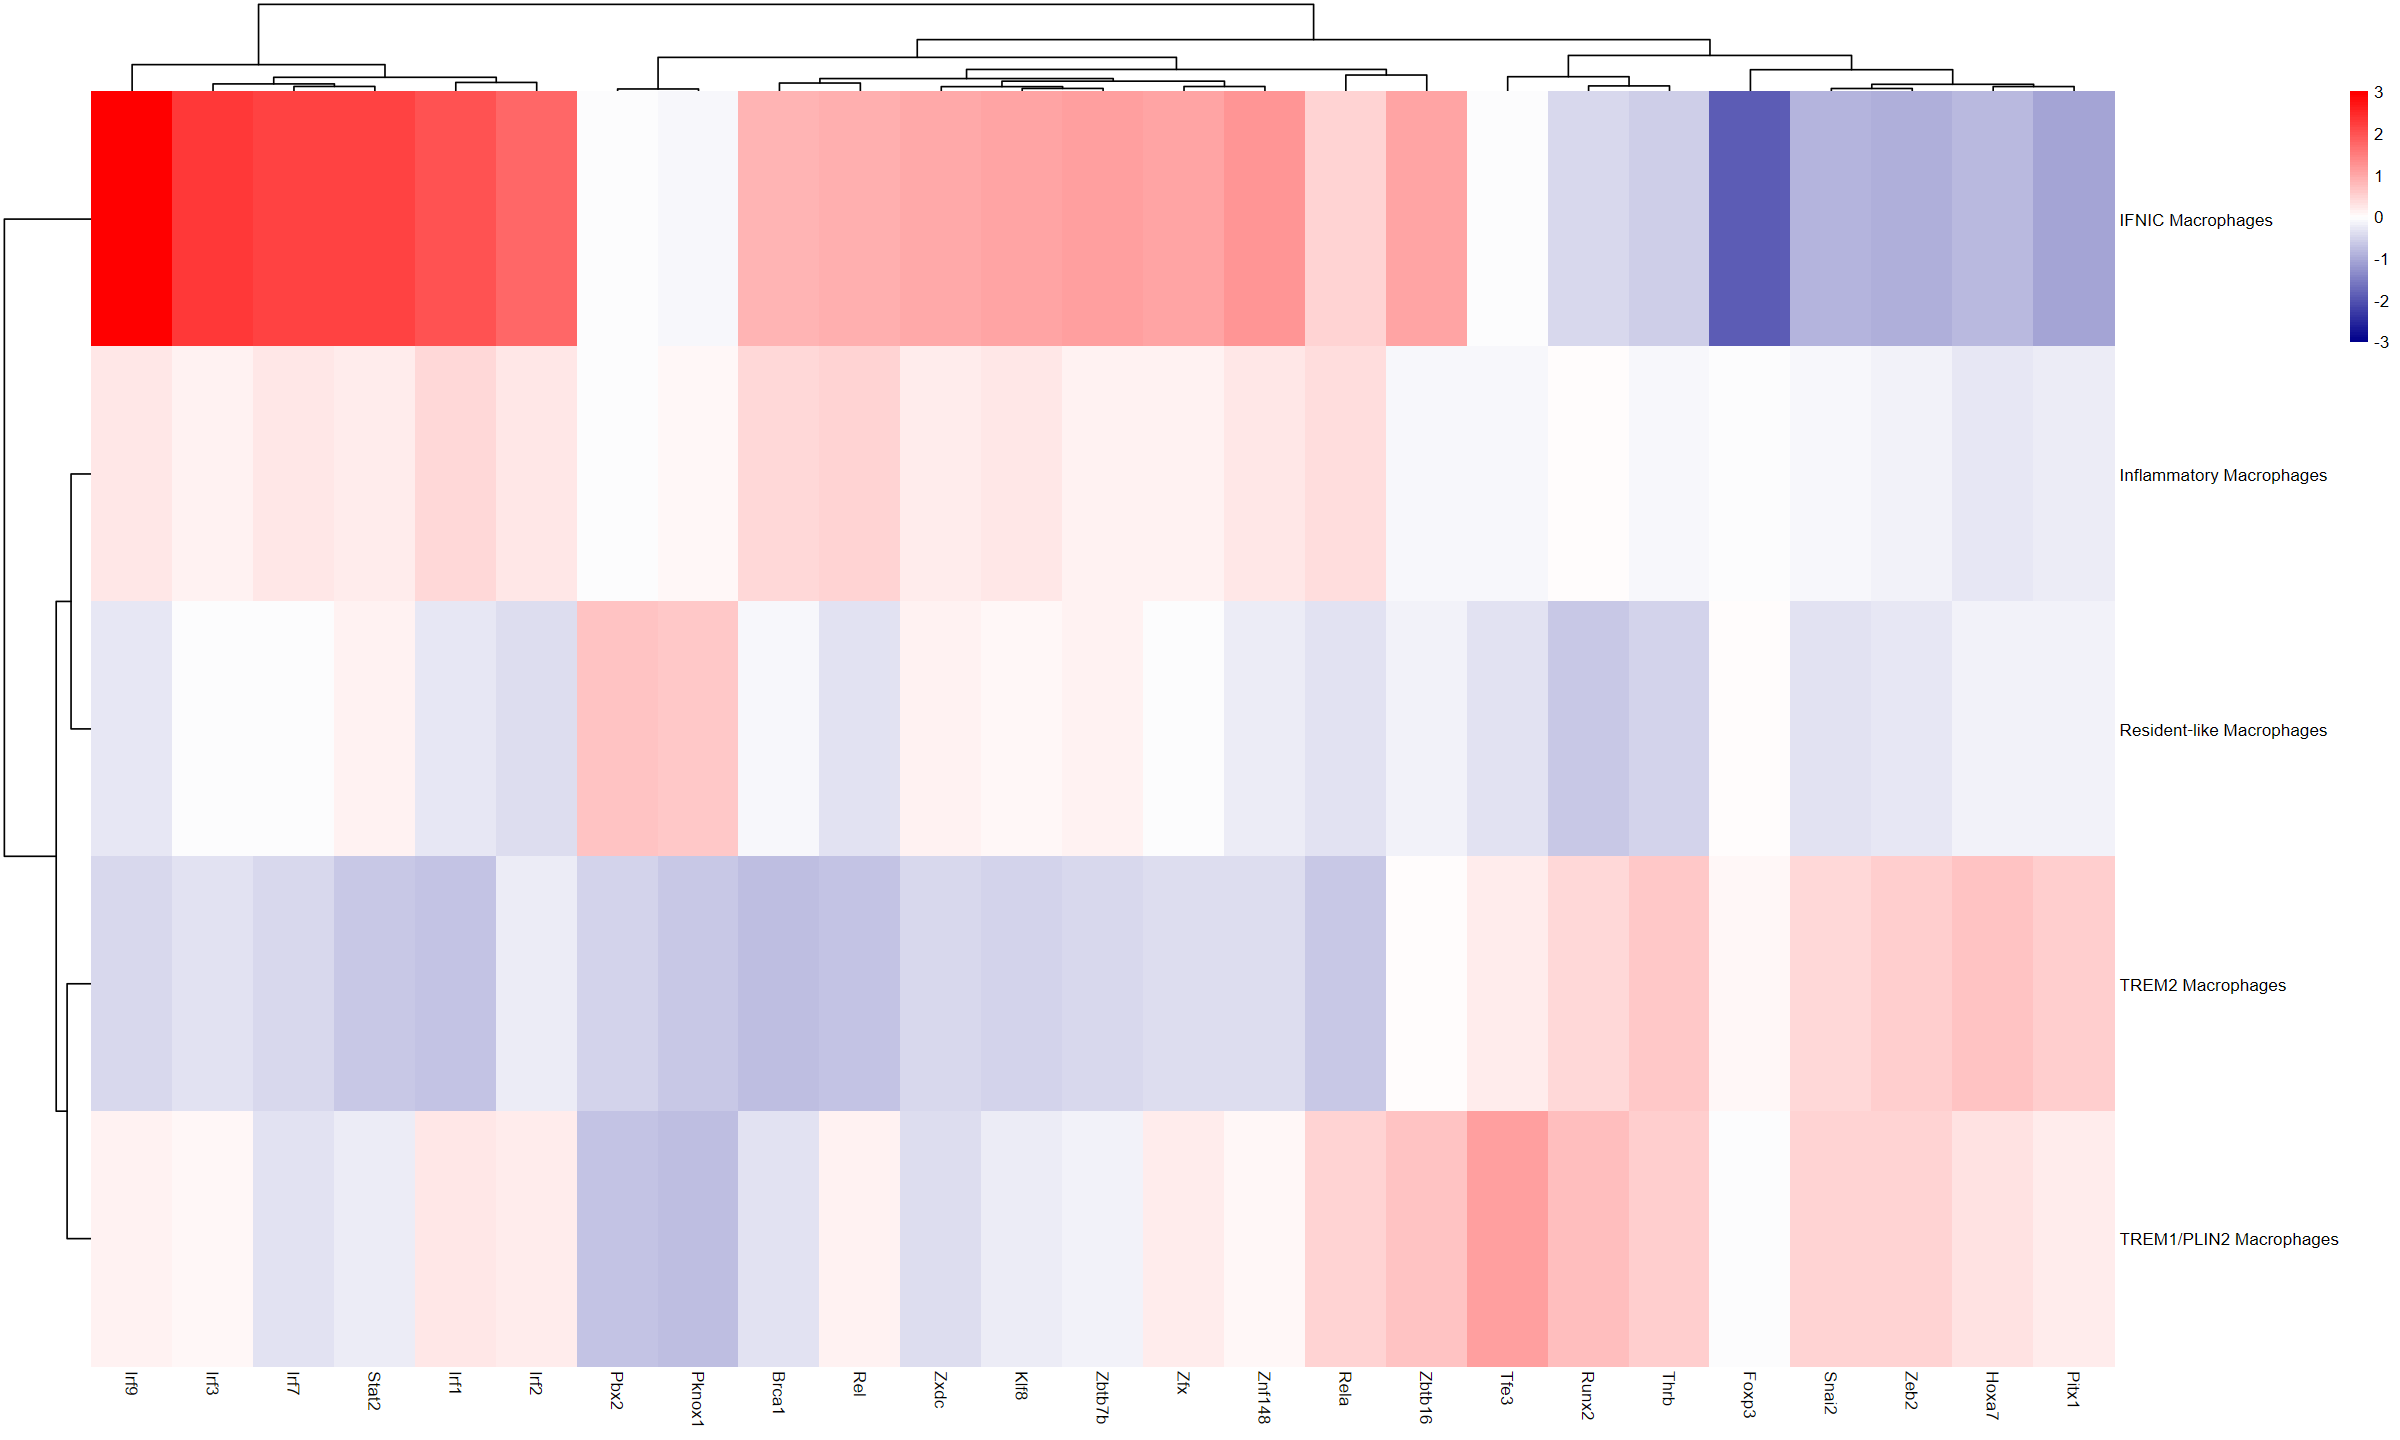

In [ ]:
# Choose number of tfs
n_tfs <- 25

# Extract tfs and store in df
df <- t(as.matrix(macrophages@assays$tfsulm["data"])) %>%
  as.data.frame() %>%
  mutate(cluster = Idents(macrophages)) %>%
  pivot_longer(cols = -cluster, names_to = "source", values_to = "score") %>%
  group_by(cluster, source) %>%
  summarise(mean = mean(score))

# Get n_tfs with filter
tfs <- df %>%
  group_by(source) %>%
  summarise(std = sd(mean)) %>%
  arrange(-abs(std)) %>%
  head(n_tfs) %>%
  pull(source)

# Subset
top_acts_mat <- df %>%
  filter(source %in% tfs) %>%
  pivot_wider(id_cols = 'cluster', names_from = 'source',
              values_from = 'mean') %>%
  column_to_rownames('cluster') %>%
  as.matrix()

# Colors
palette_length = 100
my_color = colorRampPalette(c("Darkblue", "white","red"))(palette_length)

my_breaks <- c(seq(-3, 0, length.out=ceiling(palette_length/2) + 1),
               seq(0.05, 3, length.out=floor(palette_length/2)))

# Plot
pheatmap(top_acts_mat, border_color = NA, color=my_color, breaks = my_breaks) 

In [ ]:
# Heatmap with Koen markers
genes <- c("APOE", "CD81", "TREM2", "C1QC", "CD9", "A2M", "APOC1", "C1QB", "SLCO2B1", "MSR1", 
           "CD59", "NRP2", "FABP5", "VAT1", "VSIG4", "JAML", "LIMD2", "TNFSF10", "RIPOR2", "RAB24", "PLAC8", 
           "ICAM3", "CLEC12A", "C19ORF38", "SELL", "IFITM1", "CD1D", "PRAM1", "TMEM154", "TESC", 
           "C15ORF48", "VEGFA", "PLIN2", "CLEC5A", "HIF1A-AS3", "TNFS1", "ERO1A", "HK2", 
           "SLC2A3", "DDIT4", "TMEM158", "OLR1", "NDRG1", "BNIP3", "ADM", "SELENOP", "PLTP", 
           "SLC40A1", "C1QA", "CCL18", "ILILRB5", "FOLR2", "LGMN", "F13A1", "DAB2", "FUCA1", 
           "MAF", "FRMD4B")


# Plot heatmap
heatmap_markergenes <- DoHeatmap(macrophages, features = genes, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white")
heatmap_markergenes

Warning message in DoHeatmap(macrophages, features = genes, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: FRMD4B, ILILRB5, TNFS1, C15ORF48, TESC, PRAM1, C19ORF38, RAB24, CD81"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [ ]:
# Find markers for each cluster
markers <- FindAllMarkers(macrophages, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster Inflammatory Macrophages

Calculating cluster Resident-like Macrophages

Calculating cluster iLAM

Calculating cluster LAM

Calculating cluster IFNIC Macrophages

Calculating cluster Proliferating Macrophages



In [ ]:
# View topmarkers based on filter
top_markers <- markers %>% group_by(cluster) %>% filter(p_val_adj < 0.05, avg_log2FC > .5) %>% slice_max(order_by = avg_log2FC, n = 10)  %>% arrange(cluster, desc(pct.1)) 
top_markers

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster                  
1  5.257981e-269 1.289216   0.580 0.336 2.611271e-264 Inflammatory Macrophages 
2  3.481586e-223 1.252355   0.567 0.351 1.729060e-218 Inflammatory Macrophages 
3  3.401978e-197 1.376743   0.409 0.209 1.689524e-192 Inflammatory Macrophages 
4  3.359715e-182 1.387357   0.403 0.211 1.668535e-177 Inflammatory Macrophages 
5  2.728871e-154 1.421215   0.384 0.210 1.355239e-149 Inflammatory Macrophages 
6  2.588650e-159 1.147047   0.361 0.180 1.285601e-154 Inflammatory Macrophages 
7  5.548475e-308 2.463097   0.347 0.115 2.755539e-303 Inflammatory Macrophages 
8  9.942622e-261 1.866068   0.340 0.123 4.937804e-256 Inflammatory Macrophages 
9  1.922946e-118 1.207063   0.315 0.168 9.549929e-114 Inflammatory Macrophages 
10 3.415879e-198 1.856450   0.263 0.092 1.696428e-193 Inflammatory Macrophages 
11  0.000000e+00 2.590421   0.918 0.393  0.000000e+00 Resident-like Macrophages
12  0.000000e+00 2.243277   0.768 0.404  0.000000e+00 Resident-like Macrophages
13  0.000000e+00 2.776936   0.674 0.223  0.000000e+00 Resident-like Macrophages
14  0.000000e+00 2.711061   0.497 0.122  0.000000e+00 Resident-like Macrophages
15  0.000000e+00 2.299035   0.489 0.142  0.000000e+00 Resident-like Macrophages
16 4.675509e-229 2.199314   0.308 0.096 2.321998e-224 Resident-like Macrophages
17 7.059924e-284 2.584859   0.306 0.078 3.506170e-279 Resident-like Macrophages
18 5.495953e-159 2.013407   0.270 0.097 2.729455e-154 Resident-like Macrophages
19  0.000000e+00 3.266042   0.268 0.045  0.000000e+00 Resident-like Macrophages
20 3.512272e-183 2.037044   0.256 0.078 1.744300e-178 Resident-like Macrophages
21  0.000000e+00 2.757982   0.864 0.578  0.000000e+00 iLAM                     
22  0.000000e+00 2.796226   0.708 0.207  0.000000e+00 iLAM                     
23  0.000000e+00 2.569659   0.671 0.231  0.000000e+00 iLAM                     
24  0.000000e+00 3.263484   0.511 0.124  0.000000e+00 iLAM                     
25  0.000000e+00 2.888042   0.490 0.105  0.000000e+00 iLAM                     
26  0.000000e+00 2.714585   0.464 0.093  0.000000e+00 iLAM                     
27  0.000000e+00 2.493740   0.455 0.144  0.000000e+00 iLAM                     
28  0.000000e+00 2.394946   0.388 0.092  0.000000e+00 iLAM                     
29  0.000000e+00 3.467768   0.277 0.038  0.000000e+00 iLAM                     
30 6.664685e-284 2.851261   0.261 0.057 3.309882e-279 iLAM                     
31  0.000000e+00 2.220667   0.944 0.807  0.000000e+00 LAM                      
32  0.000000e+00 3.132196   0.901 0.388  0.000000e+00 LAM                      
33  0.000000e+00 2.202054   0.840 0.413  0.000000e+00 LAM                      
34 8.495683e-129 2.305667   0.556 0.343 4.219211e-124 LAM                      
35  0.000000e+00 2.535042   0.539 0.183  0.000000e+00 LAM                      
36 4.394983e-236 2.288461   0.395 0.130 2.182680e-231 LAM                      
37  0.000000e+00 4.501818   0.355 0.075  0.000000e+00 LAM                      
38  0.000000e+00 3.477774   0.330 0.056  0.000000e+00 LAM                      
39 1.519521e-114 2.343062   0.258 0.100 7.546397e-110 LAM                      
40 7.668606e-213 2.425324   0.255 0.059 3.808460e-208 LAM                      
41  0.000000e+00 3.887971   0.880 0.340  0.000000e+00 IFNIC Macrophages        
42  0.000000e+00 3.691849   0.822 0.184  0.000000e+00 IFNIC Macrophages        
43  0.000000e+00 4.531422   0.600 0.080  0.000000e+00 IFNIC Macrophages        
44  0.000000e+00 3.413092   0.505 0.076  0.000000e+00 IFNIC Macrophages        
45  0.000000e+00 3.782333   0.503 0.078  0.000000e+00 IFNIC Macrophages        
46 9.837476e-211 3.360803   0.496 0.126 4.885586e-206 IFNIC Macrophages        
47  0.000000e+00 4.830452   0.439 0.033  0.000000e+00 IFNIC Macrophages        
48  0.000000e+00 3.746721   0.412 0.041  0.000000e+00 IFNIC Macrophages        
49  0.000000e+00 6.228129   0.317 0.021  0.000000e+00 IFNIC Macrophages        
50 

Warning message in DoHeatmap(macrophages, features = top10$gene, size = 1, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: PDGFC"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


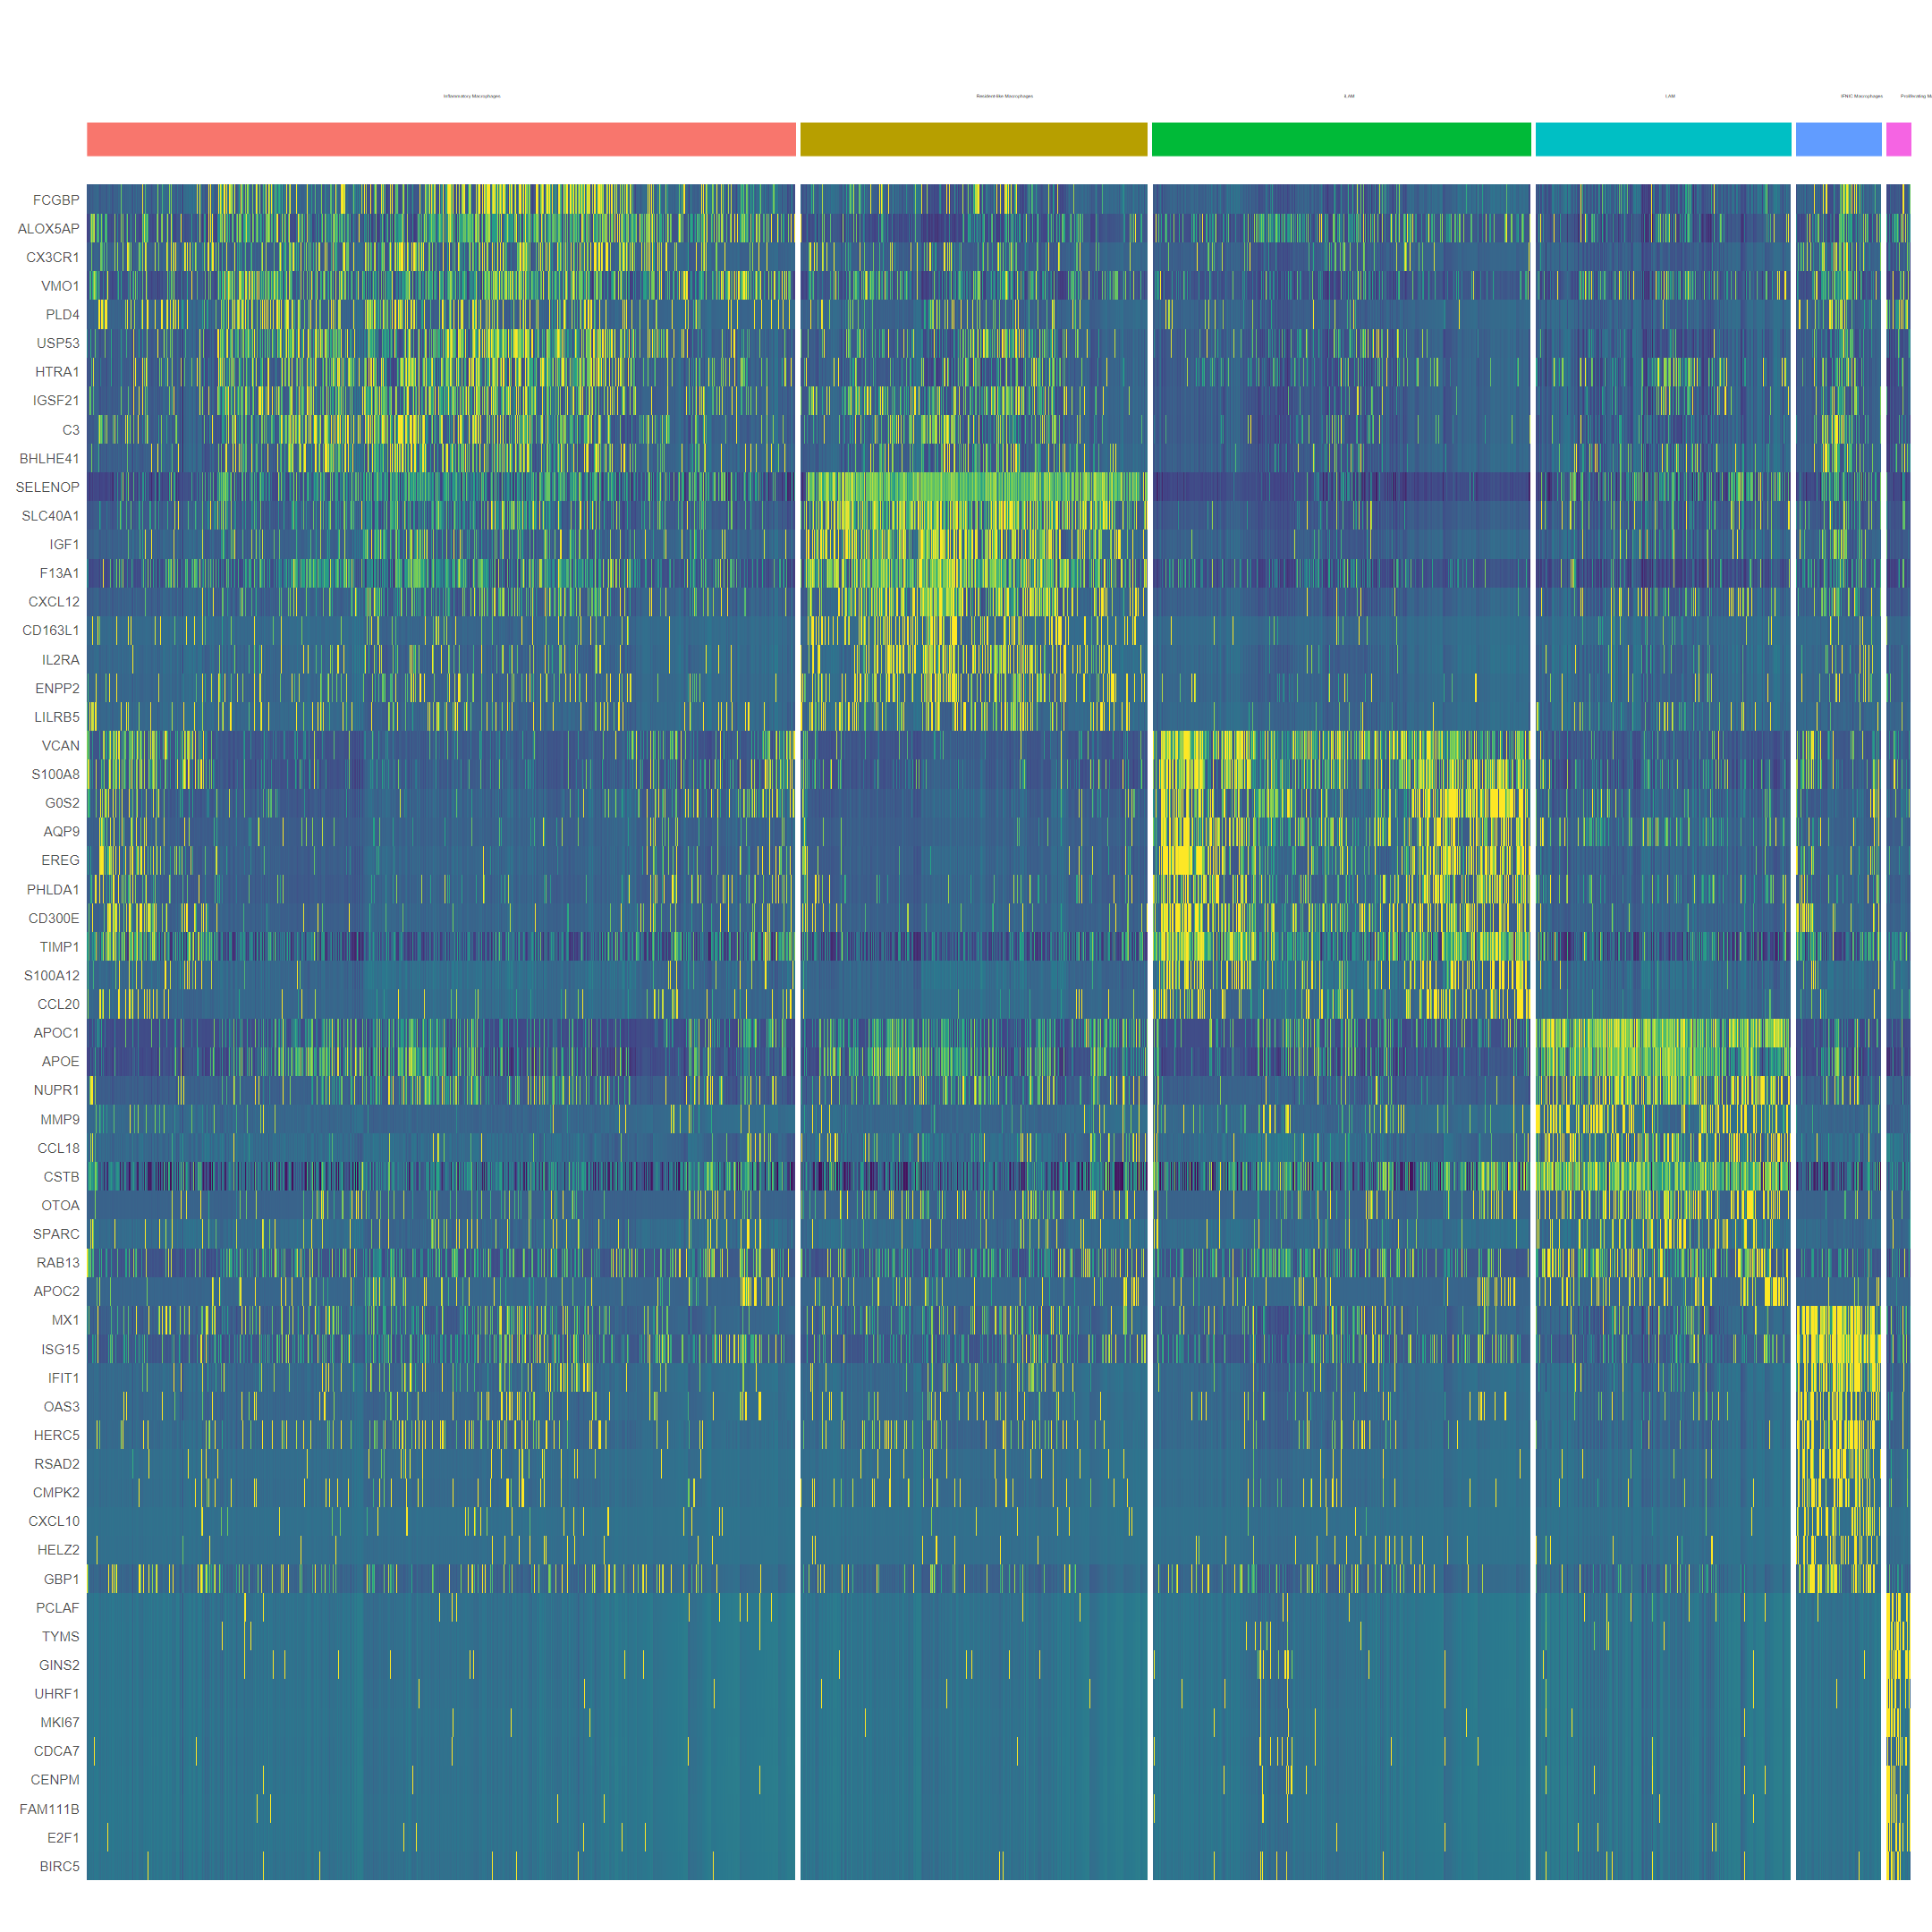

In [ ]:
# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
heatmap_markergenes <- DoHeatmap(macrophages, features = top10$gene, size=1, angle=0, raster=FALSE) &
  scale_fill_viridis_c(option="blue",na.value = "white") & theme(legend.position =  "none")
heatmap_markergenes

In [ ]:
# Some marker genes according to Winther & Willemsen
features_inflammatory <- c("S100a8", "S100a9", "Il1b", "Casp1", "Casp4", "Nlrp3")
features_resident <- c("Lyve1", "Cx3cr1", "Folr2", "C1qa", "C1qb", "C1qc", "Cd74") 
features_trem2 <- c("Trem2", "Cd9", "Fabp5", "Apoe", "Apoc1")
features_ifnic <- c("Isg15", "Irf7", "Ifit3", "Ifit1")
features_proliferating <- c("Stmn1", "Top2a", "Mki67", "Tuba1b", "Tubb5")
features_ILAM <- c("Vegfa", "Plin2", "Trem1", "Clec5a", "Anpep")


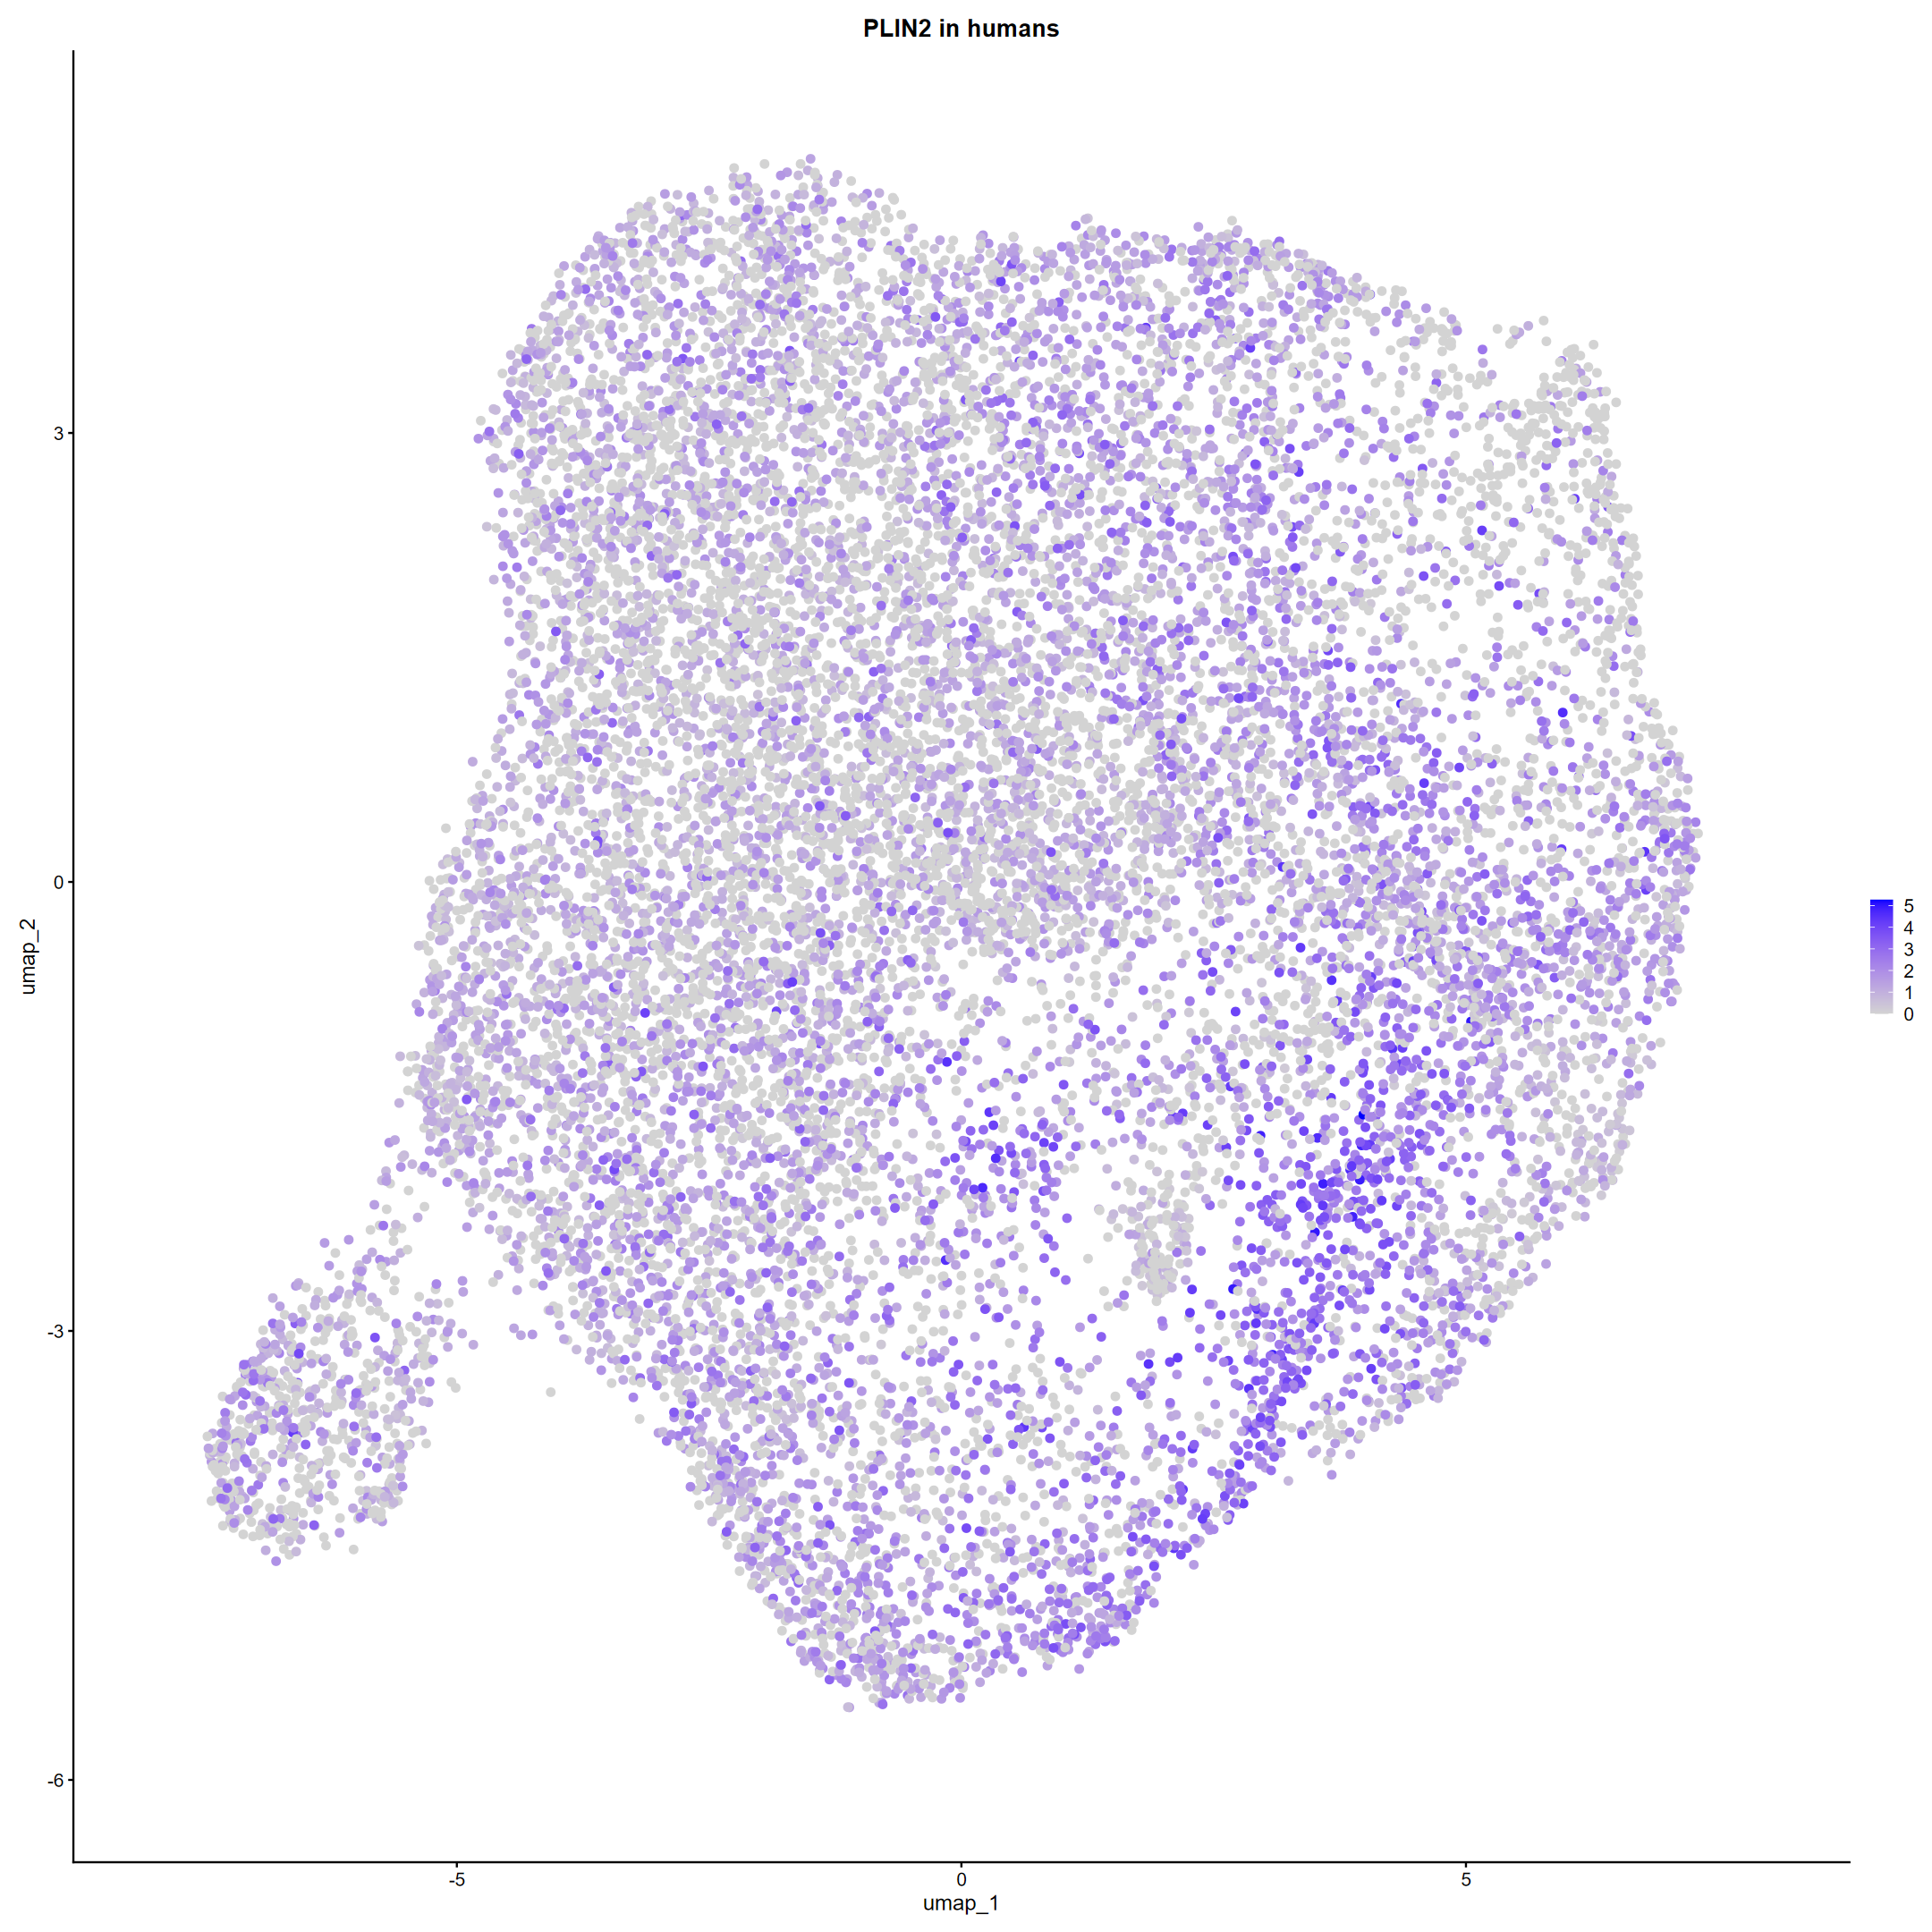

In [ ]:
# Featureplot of Plin2
FeaturePlot(macrophages, reduction = "umap", features = "PLIN2", ncol = 1, pt.size = 2) + ggtitle("PLIN2 in humans")

In [28]:
# Proportion tables
Percentage_cells <- prop.table(table(Idents(macrophages))) * 100

# Combine tables side by side
combined_df <- cbind(Percentage_cells)

# Print
combined_df

# Needs to be dataframe
Percentage_cells_df <- as.data.frame(Percentage_cells)
colnames(Percentage_cells_df) <- c("Celltype", "Percentage")

Percentage_cells
Inflammatory Macrophages  39.347972       
Resident-like Macrophages 19.291700       
iLAM                      21.022693       
LAM                       14.178237       
IFNIC Macrophages          4.783167       
Proliferating Macrophages  1.376231

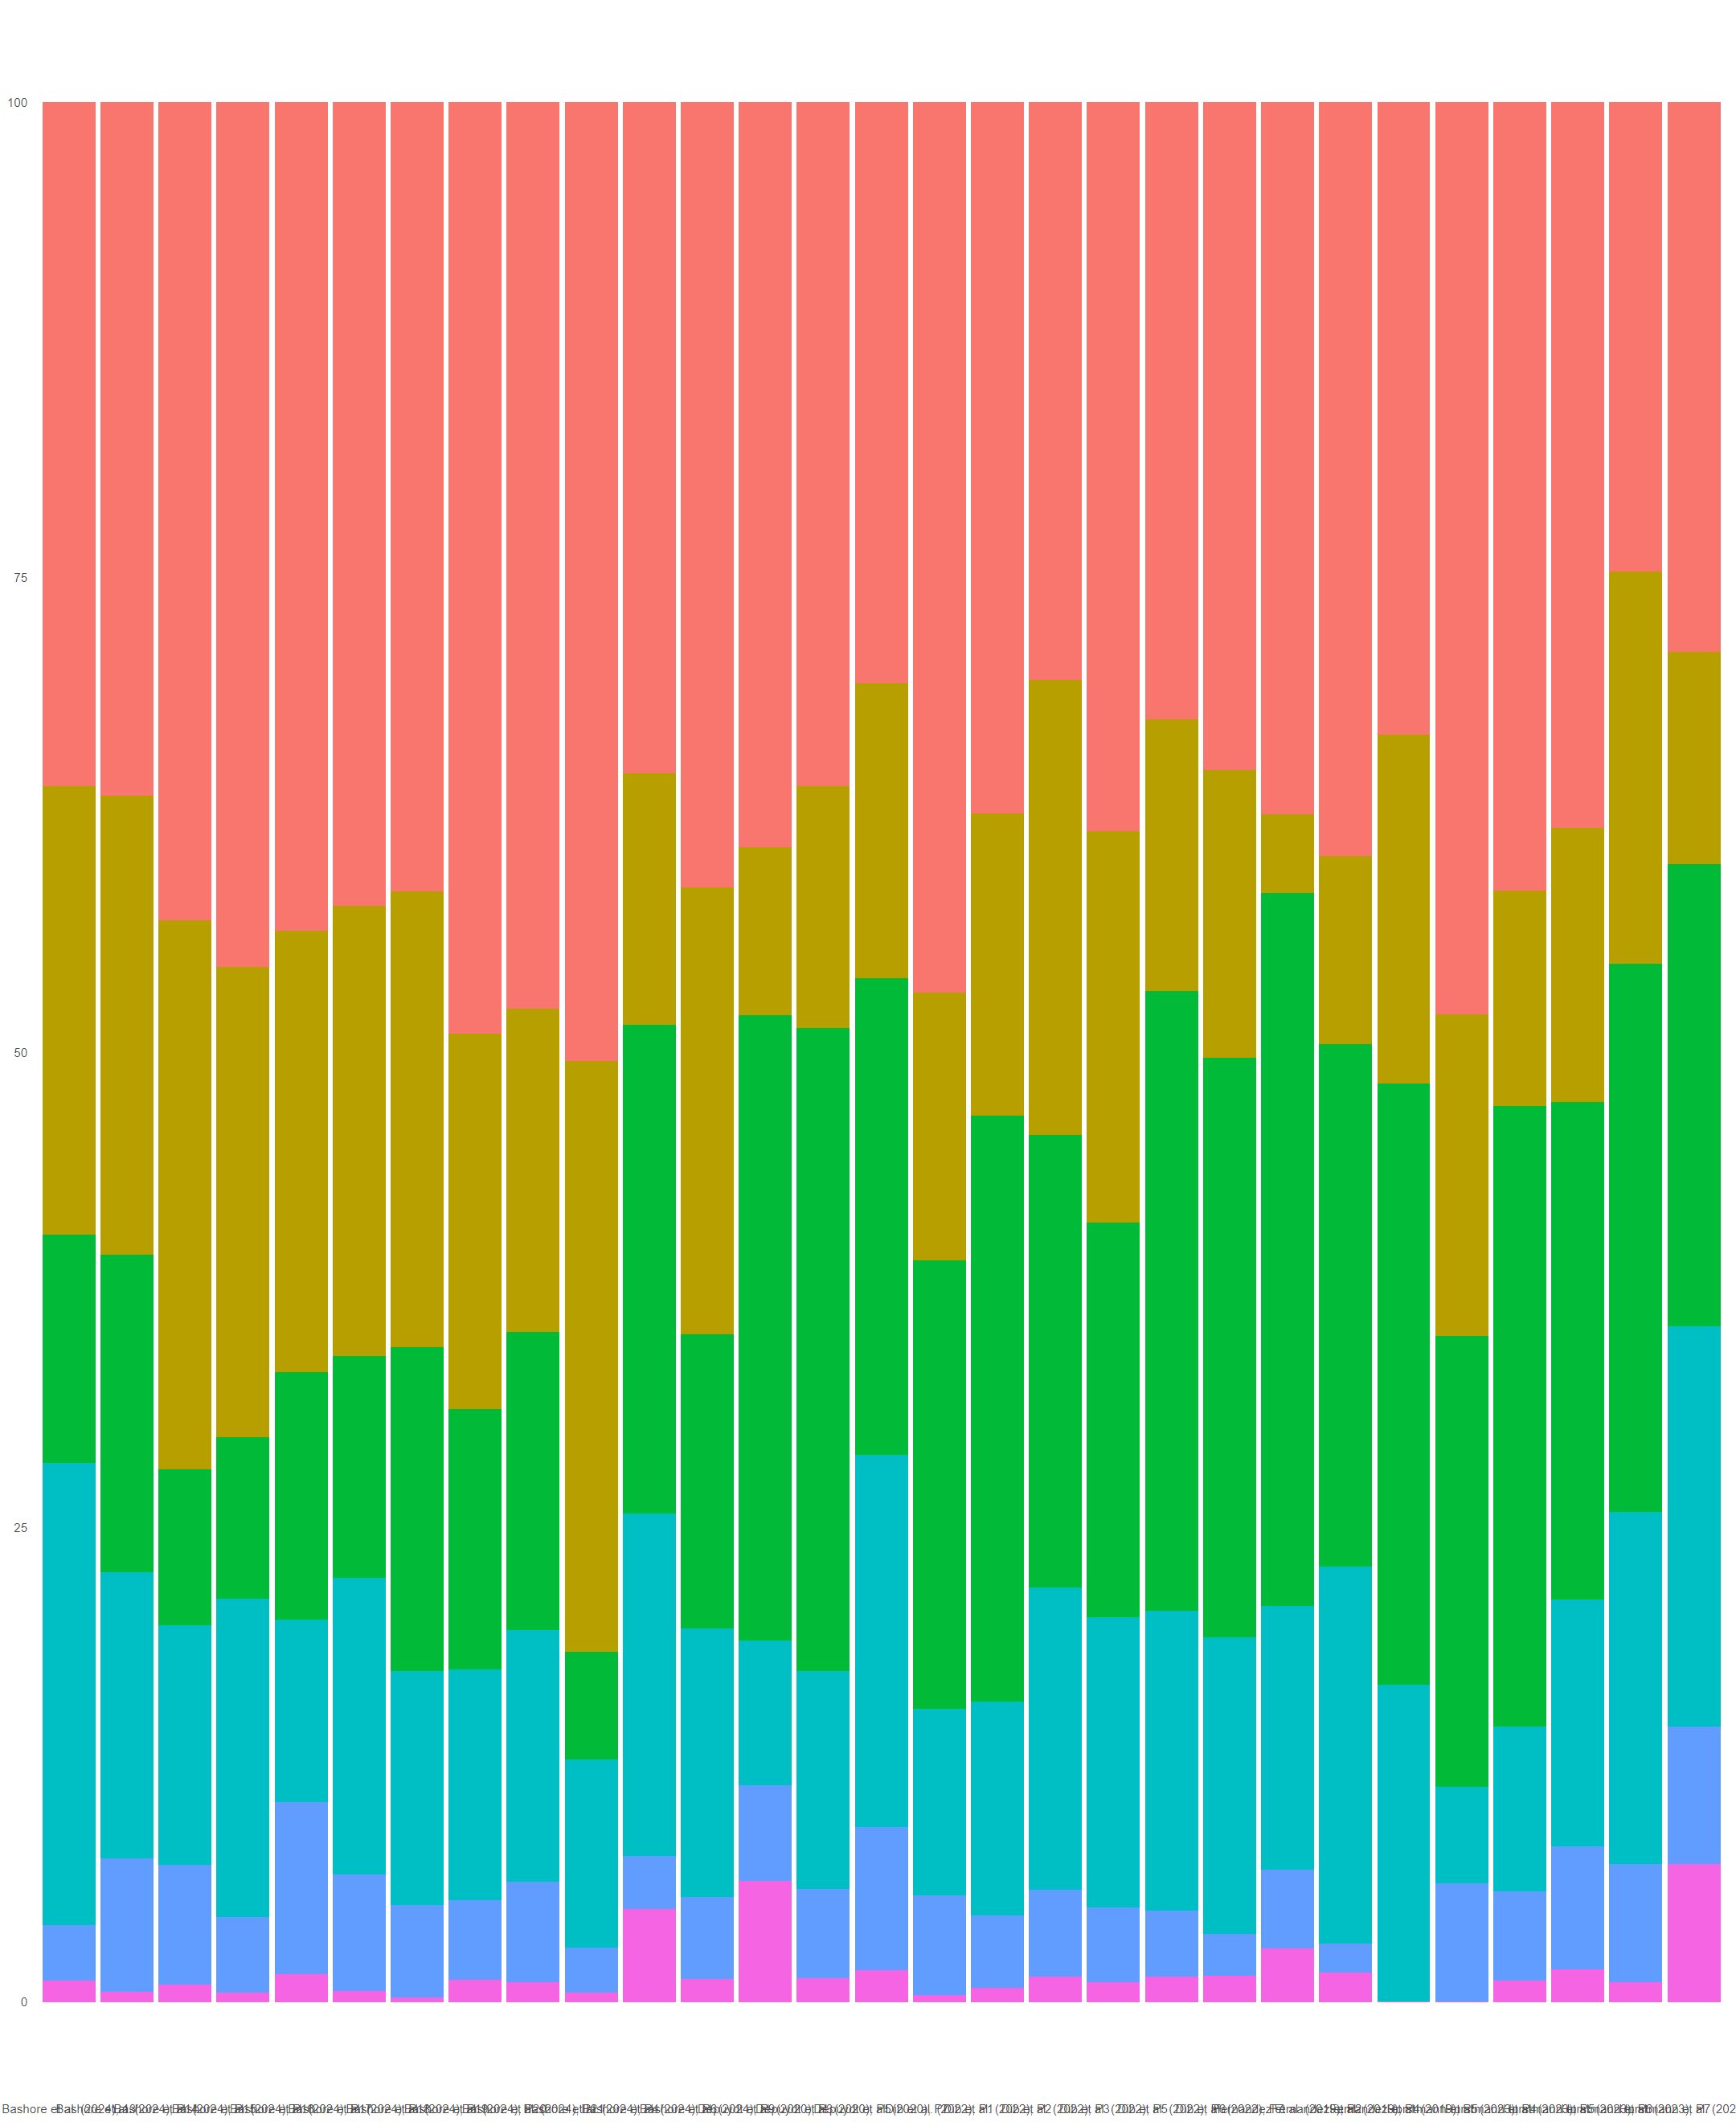

In [ ]:
# Calculate the proportions as percentages
percentage_per_orig <- prop.table(table(Idents(macrophages), macrophages$orig.ident), 2) * 100

# Needs to be dataframe
percentage_per_orig_df <- as.data.frame(percentage_per_orig)
colnames(percentage_per_orig_df) <- c("Celltype", "Condition", "Percentage")

# Create a stacked bar plot
barplot_per_origin <- ggplot(percentage_per_orig_df, aes(x = Condition, y = Percentage, fill = Celltype)) +
  geom_bar(stat = "identity") + 
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.grid = element_blank()
  ) 


barplot_per_origin

In [80]:
# Basic piechart
pie_chart_total <- ggplot(Percentage_cells_df, aes(x="", y=Percentage, fill=Celltype)) +
  geom_bar(stat="identity", width=1) +
  #scale_fill_manual(values = colors ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    panel.grid = element_blank()) +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")),  
            position = position_stack(vjust = .5), 
            color = "black",
            size = 5) +
  coord_polar("y", start=0)

In [ ]:
# Calculate the proportions as percentages
percentage_per_orig <- prop.table(table(Idents(macrophages), macrophages$orig.ident), 2) * 100

# Needs to be dataframe
percentage_per_orig_df <- as.data.frame(percentage_per_orig)
colnames(percentage_per_orig_df) <- c("Celltype", "Condition", "Percentage")

# Create a stacked bar plot
barplot_per_origin <- ggplot(percentage_per_orig_df, aes(x = Condition, y = Percentage, fill = Celltype)) +
  geom_bar(stat = "identity") + 
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    panel.grid = element_blank(),
    axis.text.x = element_blank(),
  ) 

In [ ]:
# Create UMAP plot of macrophage identities
umap_plot <- DimPlot(macrophages, reduction="umap", label = T, label.size = 7, repel = T) + 
    theme(plot.title = element_blank(), legend.position = c(0.4, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))


In [ ]:
# Create heatmap
heatmap_markergenes <- DoHeatmap(macrophages, features = top10$gene, size=4, angle=0, raster=FALSE, label = FALSE) +
  scale_fill_viridis_c(option="blue",na.value = "white") + theme(legend.position= "none", axis.text.y = element_text(size=15))

Warning message in DoHeatmap(macrophages, features = top10$gene, size = 4, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: PDGFC"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [ ]:
# Resize width / height 
options(repr.plot.width=18, repr.plot.height=22)

# Define the layout matrix
layout_matrix <- rbind(
  c(4, 4, 3, 3),
  c(4, 4, 3, 3),
  c(4, 4, 3, 3),
  c(1, 1, 2, 2),
  c(1, 1, 2, 2)
)

# Create labeled plots
barplot_per_origin2 <- arrangeGrob(barplot_per_origin, 
                                  top = textGrob("C)", x = unit(0.05, "npc"), just = "left", 
                                                 gp = gpar(fontsize = 14, fontface = "bold")))

pie_chart_total2 <- arrangeGrob(pie_chart_total, 
                               top = textGrob("D)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 14, fontface = "bold")))

umap_plot2 <- arrangeGrob(umap_plot, 
                         top = textGrob("B)", x = unit(0.05, "npc"), just = "left", 
                                        gp = gpar(fontsize = 14, fontface = "bold")))

heatmap_markergenes2 <- arrangeGrob(heatmap_markergenes, 
                                   top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                                  gp = gpar(fontsize = 14, fontface = "bold")))

# Arrange the plots with labels
grid.arrange(
  barplot_per_origin2, pie_chart_total2, umap_plot2, heatmap_markergenes2,
  layout_matrix = layout_matrix
)


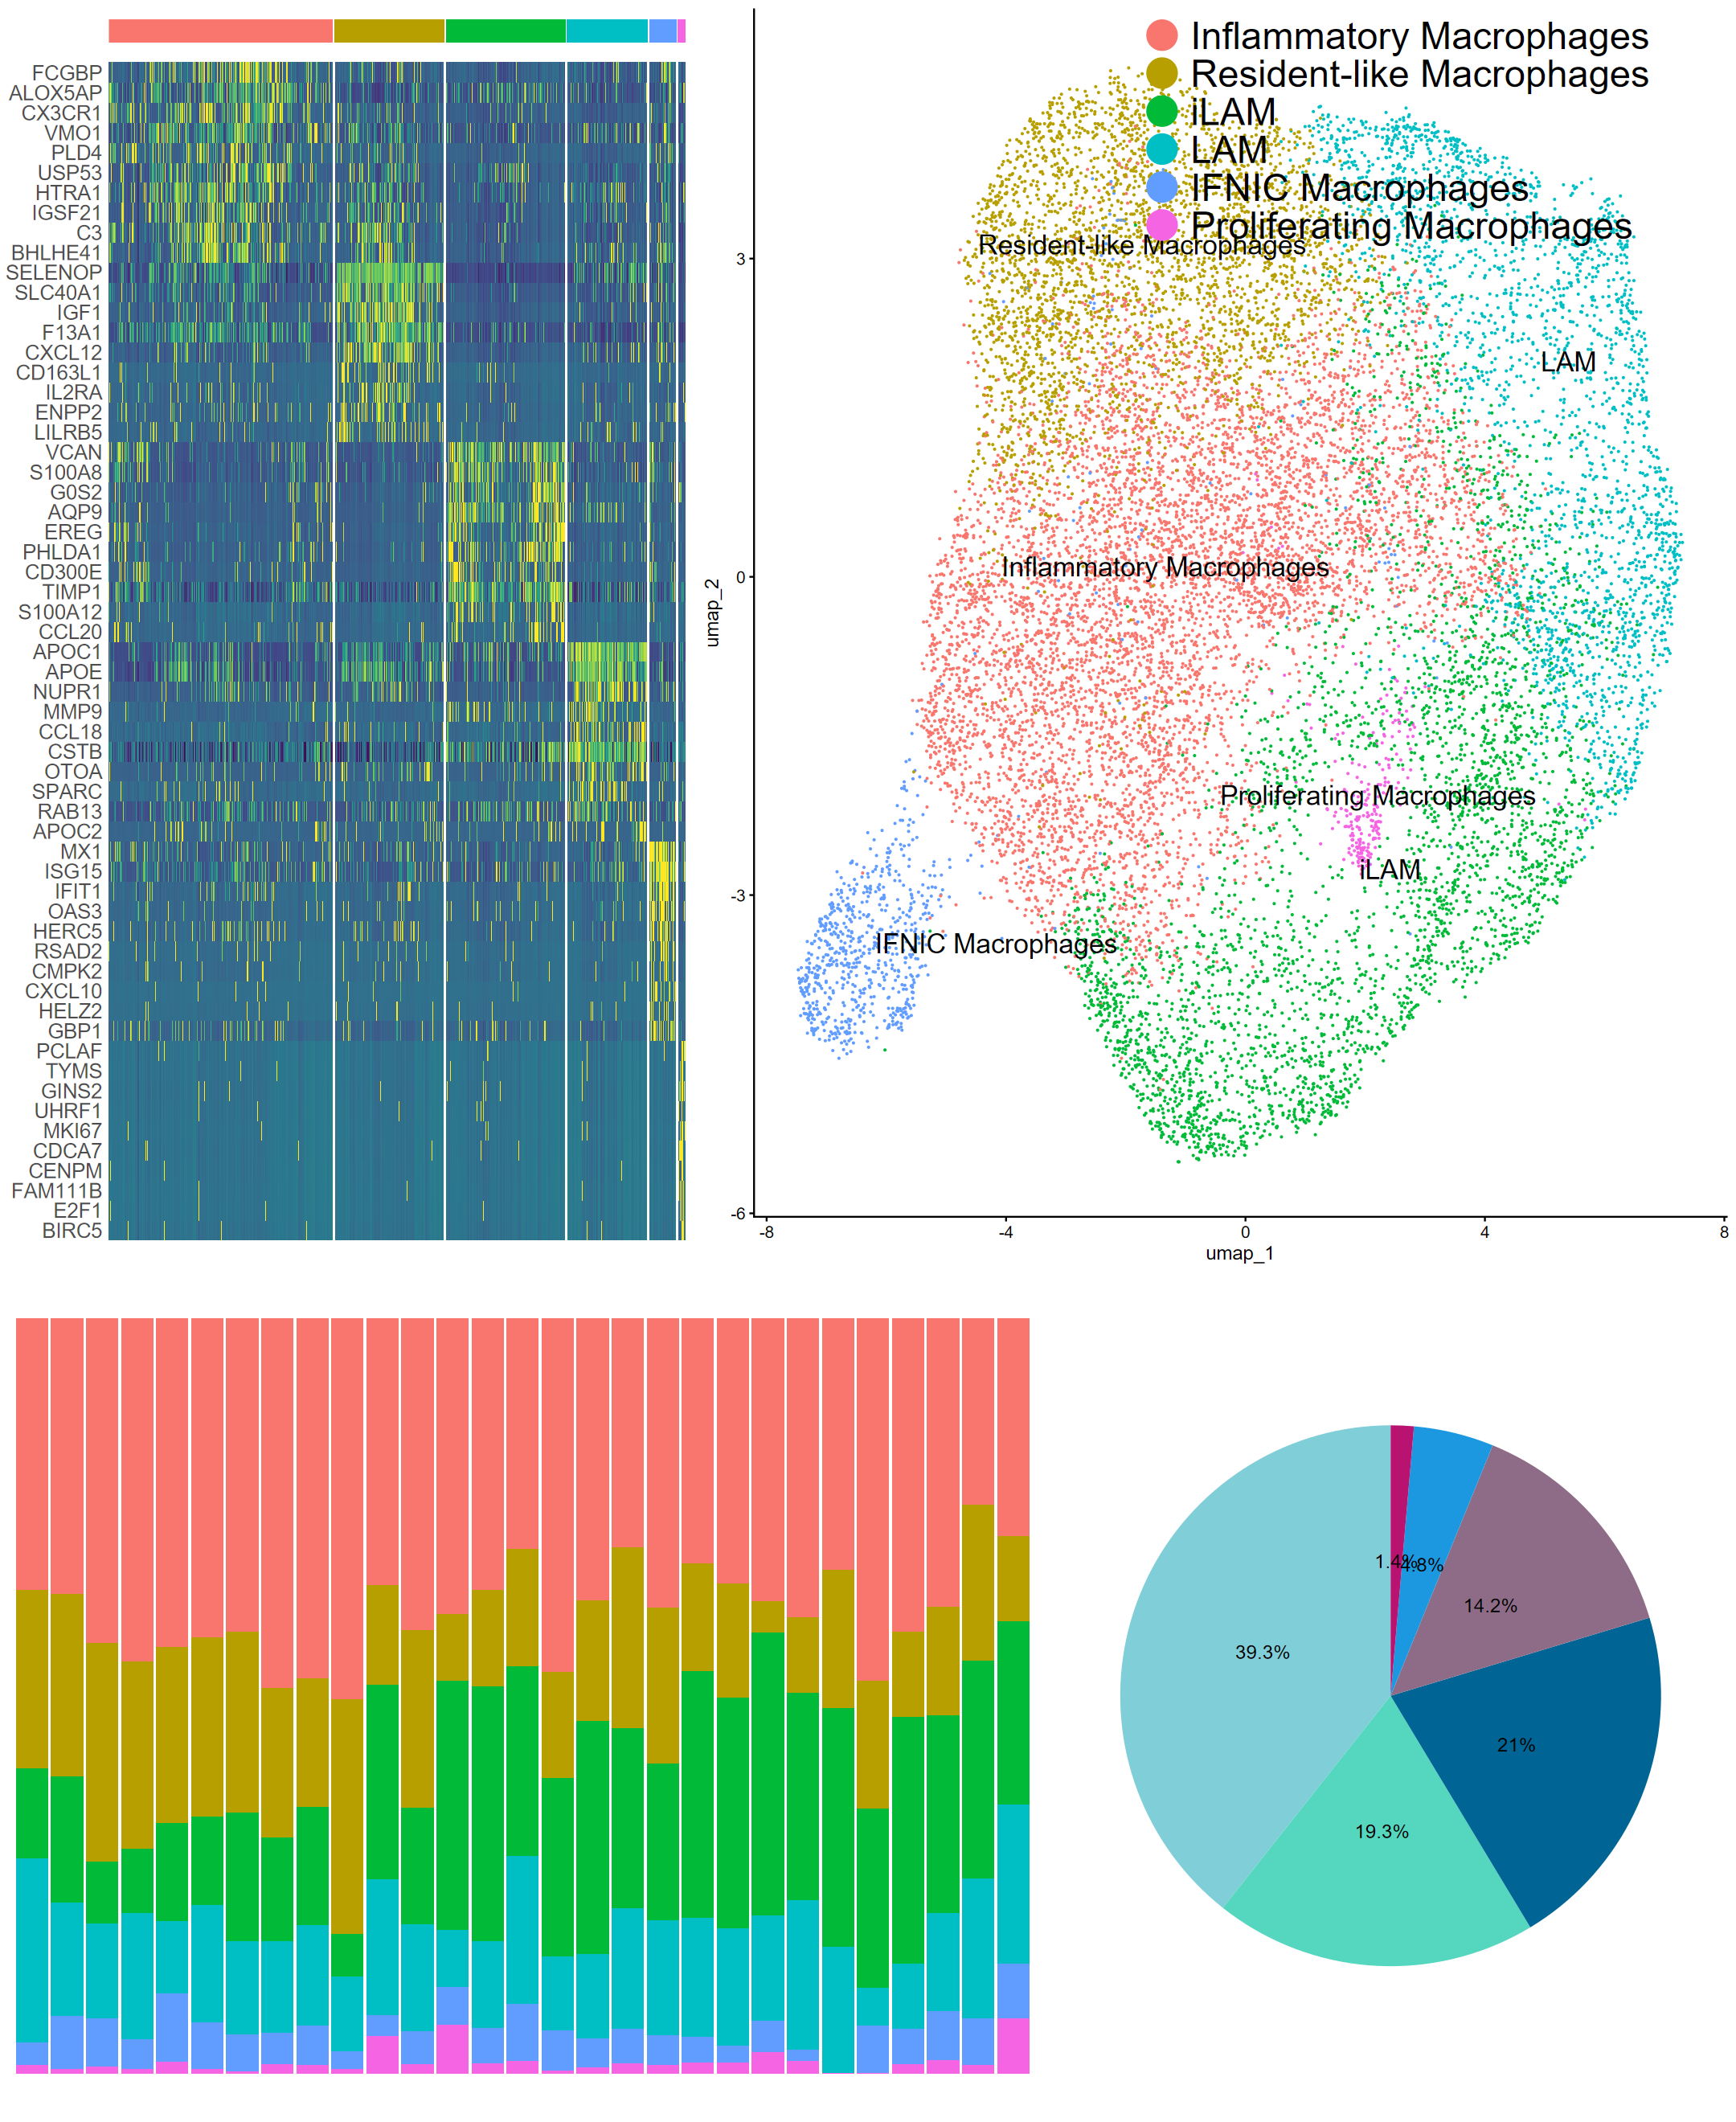

In [ ]:
# Define the layout matrix
layout_matrix <- rbind(
  c(4, 4, 4, 3, 3),
  c(4, 4, 4, 3, 3),
  c(4, 4, 4, 3, 3),
  c(1, 1, 1, 2, 2),
  c(1, 1, 1, 2, 2)
)

# Arrange the plots
grid.arrange(
  barplot_per_origin,  pie_chart_total,  umap_plot,  heatmap_markergenes,
  layout_matrix = layout_matrix
)

In [233]:
# Overrepresentation analysis
top_markers <- markers %>% group_by(cluster) %>% filter(p_val_adj < 0.05, avg_log2FC > .5) %>% slice_max(order_by = avg_log2FC, n = 10)  %>% arrange(cluster, desc(pct.1)) 
top_markers

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster                  
1   1.043339e-51 1.615817   0.825 0.627  3.199086e-47 Inflammatory Macrophages 
2   3.177871e-26 1.472592   0.708 0.503  9.743989e-22 Inflammatory Macrophages 
3   3.680306e-29 1.629631   0.534 0.296  1.128456e-24 Inflammatory Macrophages 
4   8.045771e-19 1.463673   0.449 0.255  2.466994e-14 Inflammatory Macrophages 
5   4.302569e-15 1.542803   0.393 0.232  1.319254e-10 Inflammatory Macrophages 
6   1.072570e-20 1.853433   0.354 0.156  3.288714e-16 Inflammatory Macrophages 
7   2.780463e-18 1.681471   0.354 0.172  8.525455e-14 Inflammatory Macrophages 
8   1.129170e-16 1.822504   0.319 0.155  3.462262e-12 Inflammatory Macrophages 
9   1.019884e-10 1.458237   0.311 0.188  3.127170e-06 Inflammatory Macrophages 
10  1.642961e-11 1.626028   0.267 0.138  5.037646e-07 Inflammatory Macrophages 
11  3.231622e-94 2.632773   0.768 0.246  9.908799e-90 Resident-like Macrophages
12  7.525600e-97 2.525873   0.729 0.180  2.307500e-92 Resident-like Macrophages
13  4.854957e-98 2.836812   0.704 0.161  1.488627e-93 Resident-like Macrophages
14  1.603850e-55 2.863529   0.474 0.116  4.917725e-51 Resident-like Macrophages
15  5.640901e-90 3.969453   0.469 0.042  1.729613e-85 Resident-like Macrophages
16  2.629006e-60 2.791068   0.459 0.088  8.061057e-56 Resident-like Macrophages
17  4.610289e-67 3.306536   0.456 0.076  1.413607e-62 Resident-like Macrophages
18  1.338192e-45 3.007984   0.415 0.104  4.103164e-41 Resident-like Macrophages
19  3.209369e-58 3.496552   0.381 0.055  9.840567e-54 Resident-like Macrophages
20  3.008124e-24 2.769263   0.258 0.071  9.223509e-20 Resident-like Macrophages
21  6.914474e-43 4.290048   0.631 0.283  2.120116e-38 TREM2 Macrophages        
22  4.248041e-55 2.746944   0.605 0.196  1.302534e-50 TREM2 Macrophages        
23  6.355362e-07 2.635781   0.576 0.511  1.948681e-02 TREM2 Macrophages        
24  2.316949e-08 2.659202   0.414 0.282  7.104228e-04 TREM2 Macrophages        
25  2.239444e-48 3.774447   0.404 0.082  6.866584e-44 TREM2 Macrophages        
26  8.367227e-47 2.904572   0.357 0.059  2.565559e-42 TREM2 Macrophages        
27  5.824174e-48 3.804925   0.354 0.059  1.785808e-43 TREM2 Macrophages        
28  1.034513e-27 3.046847   0.325 0.091  3.172022e-23 TREM2 Macrophages        
29  5.901428e-31 3.077489   0.264 0.050  1.809496e-26 TREM2 Macrophages        
30  3.544038e-45 4.851574   0.261 0.026  1.086673e-40 TREM2 Macrophages        
31  3.104059e-28 2.940559   0.605 0.196  9.517666e-24 TREM1/PLIN2 Macrophages  
32  6.752517e-29 2.573991   0.518 0.130  2.070457e-24 TREM1/PLIN2 Macrophages  
33  1.696343e-51 3.590141   0.500 0.067  5.201328e-47 TREM1/PLIN2 Macrophages  
34  1.781782e-42 3.171578   0.430 0.059  5.463300e-38 TREM1/PLIN2 Macrophages  
35  4.791748e-24 2.576875   0.404 0.095  1.469246e-19 TREM1/PLIN2 Macrophages  
36  8.282500e-42 3.651661   0.377 0.044  2.539580e-37 TREM1/PLIN2 Macrophages  
37  9.818452e-28 2.577779   0.360 0.063  3.010534e-23 TREM1/PLIN2 Macrophages  
38  3.815481e-32 2.576052   0.360 0.052  1.169903e-27 TREM1/PLIN2 Macrophages  
39  4.485388e-22 3.020584   0.351 0.078  1.375310e-17 TREM1/PLIN2 Macrophages  
40  3.079262e-36 3.847779   0.333 0.039  9.441632e-32 TREM1/PLIN2 Macrophages  
41  2.161802e-80 7.224602   1.000 0.032  6.628517e-76 IFNIC Macrophages        
42  6.876249e-38 5.962037   0.800 0.048  2.108396e-33 IFNIC Macrophages        
43  3.307017e-92 6.876975   0.733 0.012  1.013998e-87 IFNIC Macrophages        
44  4.346383e-48 6.685097   0.733 0.030  1.332688e-43 IFNIC Macrophages        
45 2.874892e-107 8.548665   0.667 0.007 8.814994e-103 IFNIC Macrophages        
46  4.505188e-39 7.489675   0.667 0.031  1.381381e-34 IFNIC Macrophages        
47  1.342263e-34 5.948686   0.533 0.022  4.115645e-30 IFNIC Macrophages        
48  5.891522e-30 6.251819   0.467 0.019  1.806458e-25 IFNIC Macrophages        
49  5.879020e-36 6.260535   0.333 0.007  1.802625e-31 IFNIC Macrophages        
50 

In [ ]:
# Overrepresentation analysis
top_markers <- markers %>% filter(cluster == "Inflammatory Macrophages") %>% group_by(cluster) %>% filter(p_val_adj < 0.05, avg_log2FC > .5) %>% arrange(cluster, desc(avg_log2FC))#%>% slice_max(order_by = avg_log2FC, n = 10)  %>% arrange(cluster, desc(pct.1)) 
top_markers_names <- top_markers$gene


In [ ]:
# View top markers for inflammatory macrophages
top_markers

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster                 
1  1.072570e-20 1.853433   0.354 0.156 3.288714e-16 Inflammatory Macrophages
2  1.129170e-16 1.822504   0.319 0.155 3.462262e-12 Inflammatory Macrophages
3  2.780463e-18 1.681471   0.354 0.172 8.525455e-14 Inflammatory Macrophages
4  3.680306e-29 1.629631   0.534 0.296 1.128456e-24 Inflammatory Macrophages
5  1.642961e-11 1.626028   0.267 0.138 5.037646e-07 Inflammatory Macrophages
6  1.043339e-51 1.615817   0.825 0.627 3.199086e-47 Inflammatory Macrophages
7  4.302569e-15 1.542803   0.393 0.232 1.319254e-10 Inflammatory Macrophages
8  3.177871e-26 1.472592   0.708 0.503 9.743989e-22 Inflammatory Macrophages
9  8.045771e-19 1.463673   0.449 0.255 2.466994e-14 Inflammatory Macrophages
10 1.019884e-10 1.458237   0.311 0.188 3.127170e-06 Inflammatory Macrophages
11 1.309843e-31 1.458003   0.787 0.644 4.016240e-27 Inflammatory Macrophages
12 4.592283e-29 1.445223   0.660 0.451 1.408086e-24 Inflammatory Macrophages
13 1.347068e-23 1.398967   0.742 0.597 4.130379e-19 Inflammatory Macrophages
14 9.603076e-30 1.395178   0.633 0.383 2.944495e-25 Inflammatory Macrophages
15 1.185822e-20 1.360803   0.466 0.266 3.635967e-16 Inflammatory Macrophages
16 2.091624e-16 1.353125   0.447 0.285 6.413338e-12 Inflammatory Macrophages
17 1.586860e-23 1.340398   0.629 0.431 4.865629e-19 Inflammatory Macrophages
18 9.900476e-27 1.340066   0.632 0.427 3.035684e-22 Inflammatory Macrophages
19 5.142852e-08 1.335781   0.284 0.184 1.576901e-03 Inflammatory Macrophages
20 3.231650e-11 1.331105   0.477 0.357 9.908887e-07 Inflammatory Macrophages
21 1.714102e-18 1.312780   0.480 0.302 5.255780e-14 Inflammatory Macrophages
22 1.913300e-16 1.300315   0.501 0.349 5.866561e-12 Inflammatory Macrophages
23 1.130912e-25 1.299780   0.592 0.368 3.467602e-21 Inflammatory Macrophages
24 1.516680e-23 1.282903   0.573 0.354 4.650445e-19 Inflammatory Macrophages
25 1.526450e-15 1.276656   0.393 0.220 4.680401e-11 Inflammatory Macrophages
26 3.476745e-15 1.274869   0.411 0.238 1.066039e-10 Inflammatory Macrophages
27 4.050793e-07 1.211420   0.259 0.164 1.242054e-02 Inflammatory Macrophages
28 2.703675e-09 1.211224   0.340 0.221 8.290007e-05 Inflammatory Macrophages
29 9.814770e-33 1.205172   0.728 0.490 3.009405e-28 Inflammatory Macrophages
30 3.500070e-07 1.163846   0.253 0.155 1.073191e-02 Inflammatory Macrophages
⋮  ⋮            ⋮          ⋮     ⋮     ⋮            ⋮                       
58 2.167280e-09 0.8767068  0.566 0.474 6.645313e-05 Inflammatory Macrophages
59 5.593259e-17 0.8713923  0.790 0.703 1.715005e-12 Inflammatory Macrophages
60 6.729822e-27 0.8589403  0.913 0.884 2.063498e-22 Inflammatory Macrophages
61 2.724070e-14 0.8480636  0.589 0.427 8.352544e-10 Inflammatory Macrophages
62 7.380804e-09 0.8281866  0.479 0.363 2.263102e-04 Inflammatory Macrophages
63 7.738456e-07 0.8191878  0.270 0.167 2.372765e-02 Inflammatory Macrophages
64 3.298566e-15 0.8109968  0.760 0.639 1.011406e-10 Inflammatory Macrophages
65 1.077921e-12 0.8034927  0.627 0.517 3.305121e-08 Inflammatory Macrophages
66 2.195491e-12 0.7839503  0.616 0.492 6.731814e-08 Inflammatory Macrophages
67 1.360146e-15 0.7833006  0.823 0.733 4.170481e-11 Inflammatory Macrophages
68 7.173248e-09 0.7728375  0.425 0.294 2.199461e-04 Inflammatory Macrophages
69 3.938998e-36 0.7716117  0.978 0.943 1.207776e-31 Inflammatory Macrophages
70 1.117472e-06 0.7636264  0.267 0.164 3.426392e-02 Inflammatory Macrophages
71 3.482717e-12 0.7533935  0.659 0.546 1.067871e-07 Inflammatory Macrophages
72 1.033827e-10 0.7440618  0.485 0.343 3.169920e-06 Inflammatory Macrophages
73 3.279142e-15 0.7400703  0.790 0.686 1.005450e-10 Inflammatory Macrophages
74 9.496386e-07 0.7277068  0.270 0.165 2.911782e-02 Inflammatory Macrophages
75 2.756707e-10 0.7081724  0.665 0.574 8.452616e-06 Inflammatory Macrophages
76 1.276149e-06 0.6964453  0.788 0.747 3.912928e-02 Inflammatory Macrophages
77 1.497841e-07 0.6585723  0.577 0.493 4.592680e-03 Inflammatory Macrophages

In [147]:
# GO enrichment BP
GO_res <- enrichGO(gene = top_markers_names, OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")
barplt_bp <- plot(barplot(GO_res, showCategory = 20))

In [ ]:
# Plot
barplt_bp

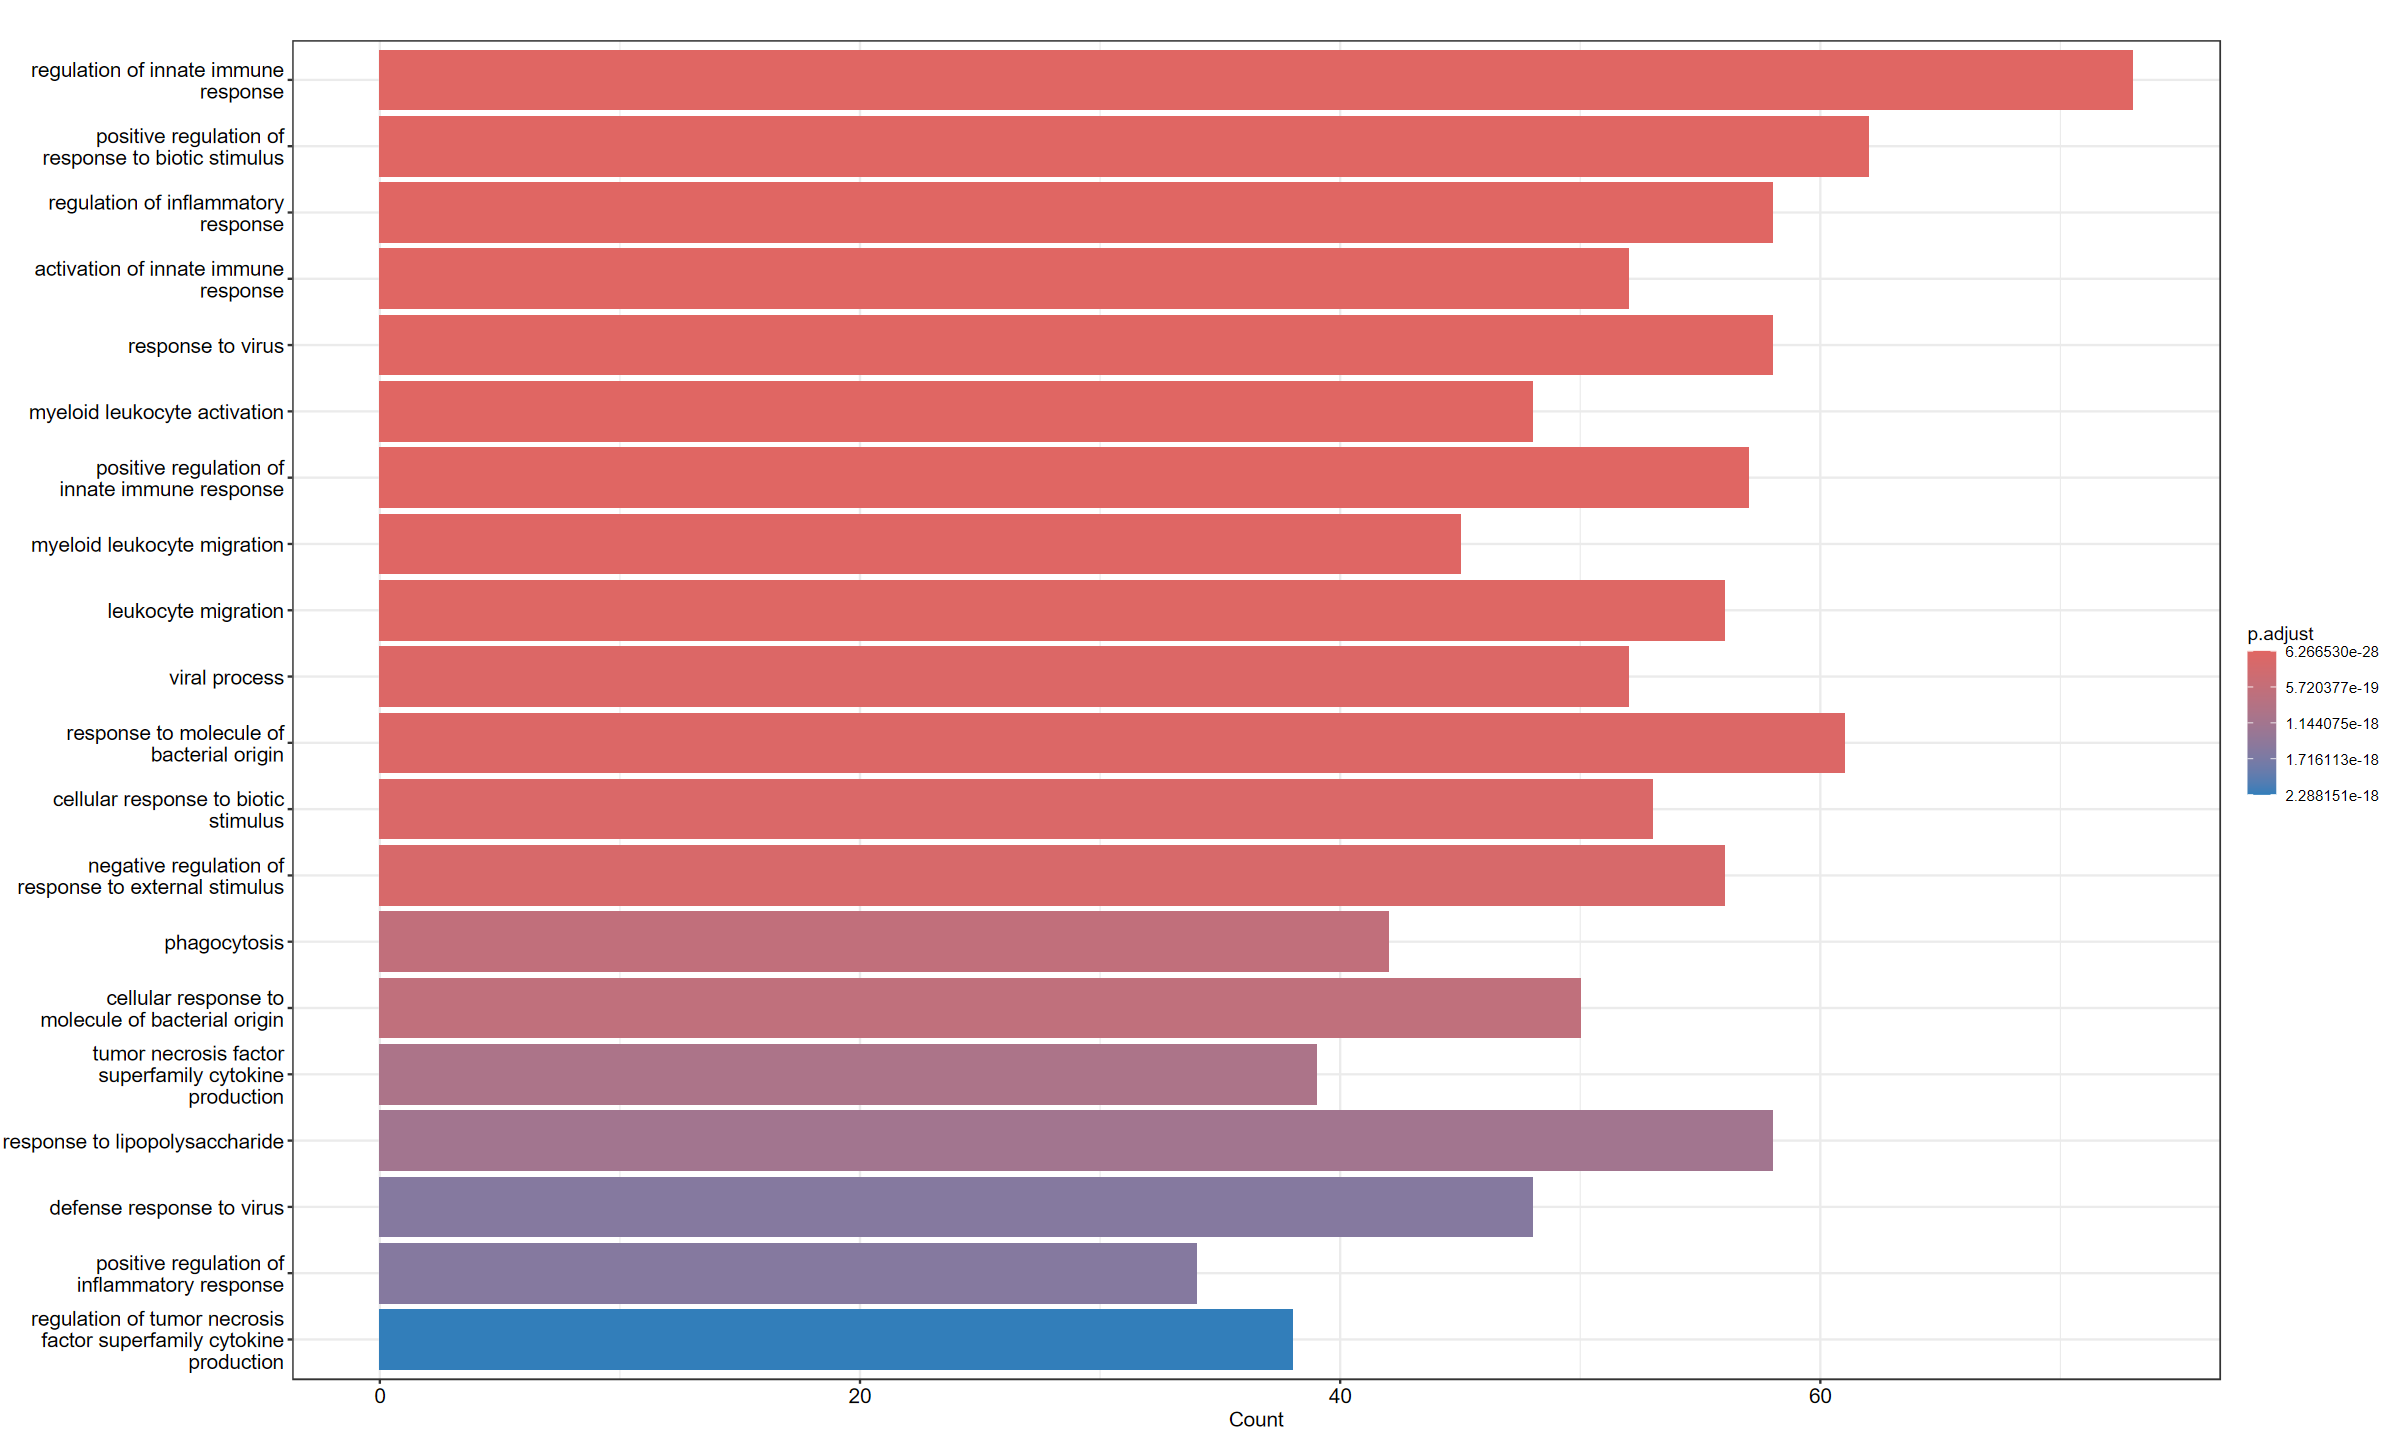

In [ ]:
# Plot barplot
barplt <-  plot(barplot(GO_res, showCategory = 20))